In [1]:
#Question 1: Implement KNN classification, using the sklearn package.

%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import scale

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['Target'] = iris.target
print 'iris data head:'
print iris_df.head()
print 'iris describe():'
print iris_df.describe()

print "label set: " + repr(iris_df['Target'].unique())

iris data head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
iris describe():
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000      

In [4]:
df_norm = pd.DataFrame(scale(iris.data), columns=iris.feature_names)
print df_norm

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.032057          -1.341272         -1.312977
1            -1.143017         -0.124958          -1.341272         -1.312977
2            -1.385353          0.337848          -1.398138         -1.312977
3            -1.506521          0.106445          -1.284407         -1.312977
4            -1.021849          1.263460          -1.341272         -1.312977
5            -0.537178          1.957669          -1.170675         -1.050031
6            -1.506521          0.800654          -1.341272         -1.181504
7            -1.021849          0.800654          -1.284407         -1.312977
8            -1.748856         -0.356361          -1.341272         -1.312977
9            -1.143017          0.106445          -1.284407         -1.444450
10           -0.537178          1.494863          -1.284407         -1.312977
11           -1.264185          0.800654          -1.227541     

In [7]:
n_neighbors = range(1, 51, 2)
print n_neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [10]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

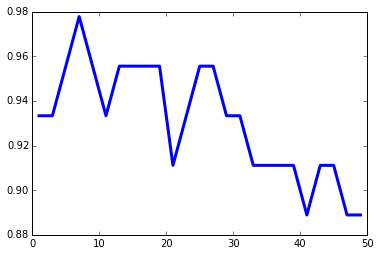

In [13]:
plt.plot(n_neighbors, scores, linewidth=3.0)

In [17]:
#Question 2: Use the sklearn package to implement cross-validation for your classifier.

from sklearn.datasets import load_iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# from sklearn.cross_validation import cross_val_score
# clf = neighbors.KNeighborsClassifier(11, weights='uniform')
# clf.fit(iris.data, iris.target)
# scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

import numpy as np
from sklearn.cross_validation import KFold

kf = KFold(10, n_folds=5)
for train, test in kf:
    print("%s %s" % (train, test))
    
    
###QUESTION: HOW LARGE SHOULD MY SAMPLE BE?

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [ ]:
#Question 3: Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

In [23]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

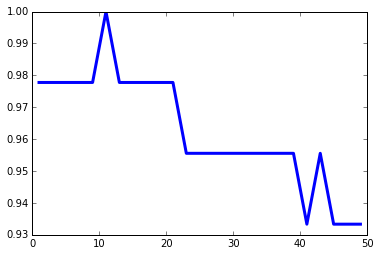

In [24]:
#Question 4: Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. Explain in words what you are seeing.
#Answer: Noise of neighbors reduces the effectiveness of clustering the data.

plt.plot(n_neighbors, scores, linewidth=3.0)

In [ ]:
#Question 5: Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn. Cross validation is a very important concept. Implementing it yourself in Python is the best way to learn and understand it. Compare the results of your cross-validation code with your results using the cross-validation in sklearn.